<a href="https://colab.research.google.com/github/MuhammadFaridMauludin/PCVK_Ganjil_2025/blob/main/Pertemuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D-1 Percobaan Histogram

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
import math
import os
import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<BarContainer object of 256 artists>

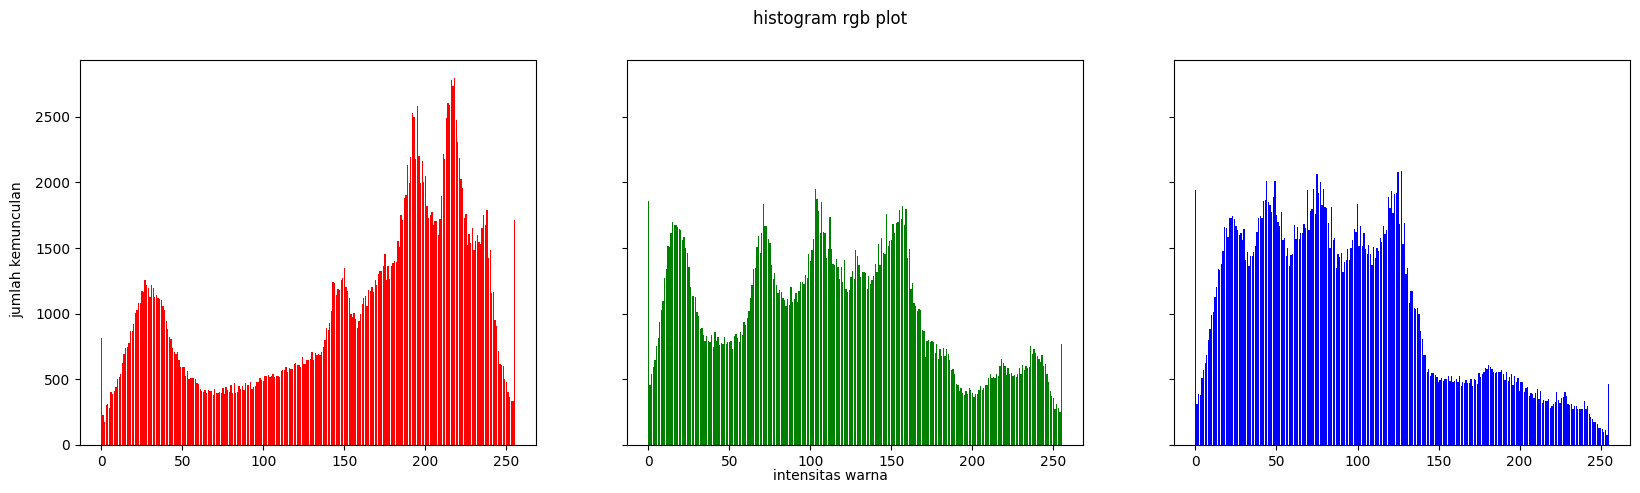

In [10]:
#membuat histogram image manual
img = cv.imread ('/content/drive/MyDrive/pcvk/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height) :
  for x in range(0, width) :
    red[img[y] [x] [0]] += 1
    green[img[y] [x] [1]] += 1
    blue[img[y] [x] [2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey= True)
fig.suptitle('histogram rgb plot')
fig.text(0.09, 0.5, 'jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'intensitas warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

### Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
### NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

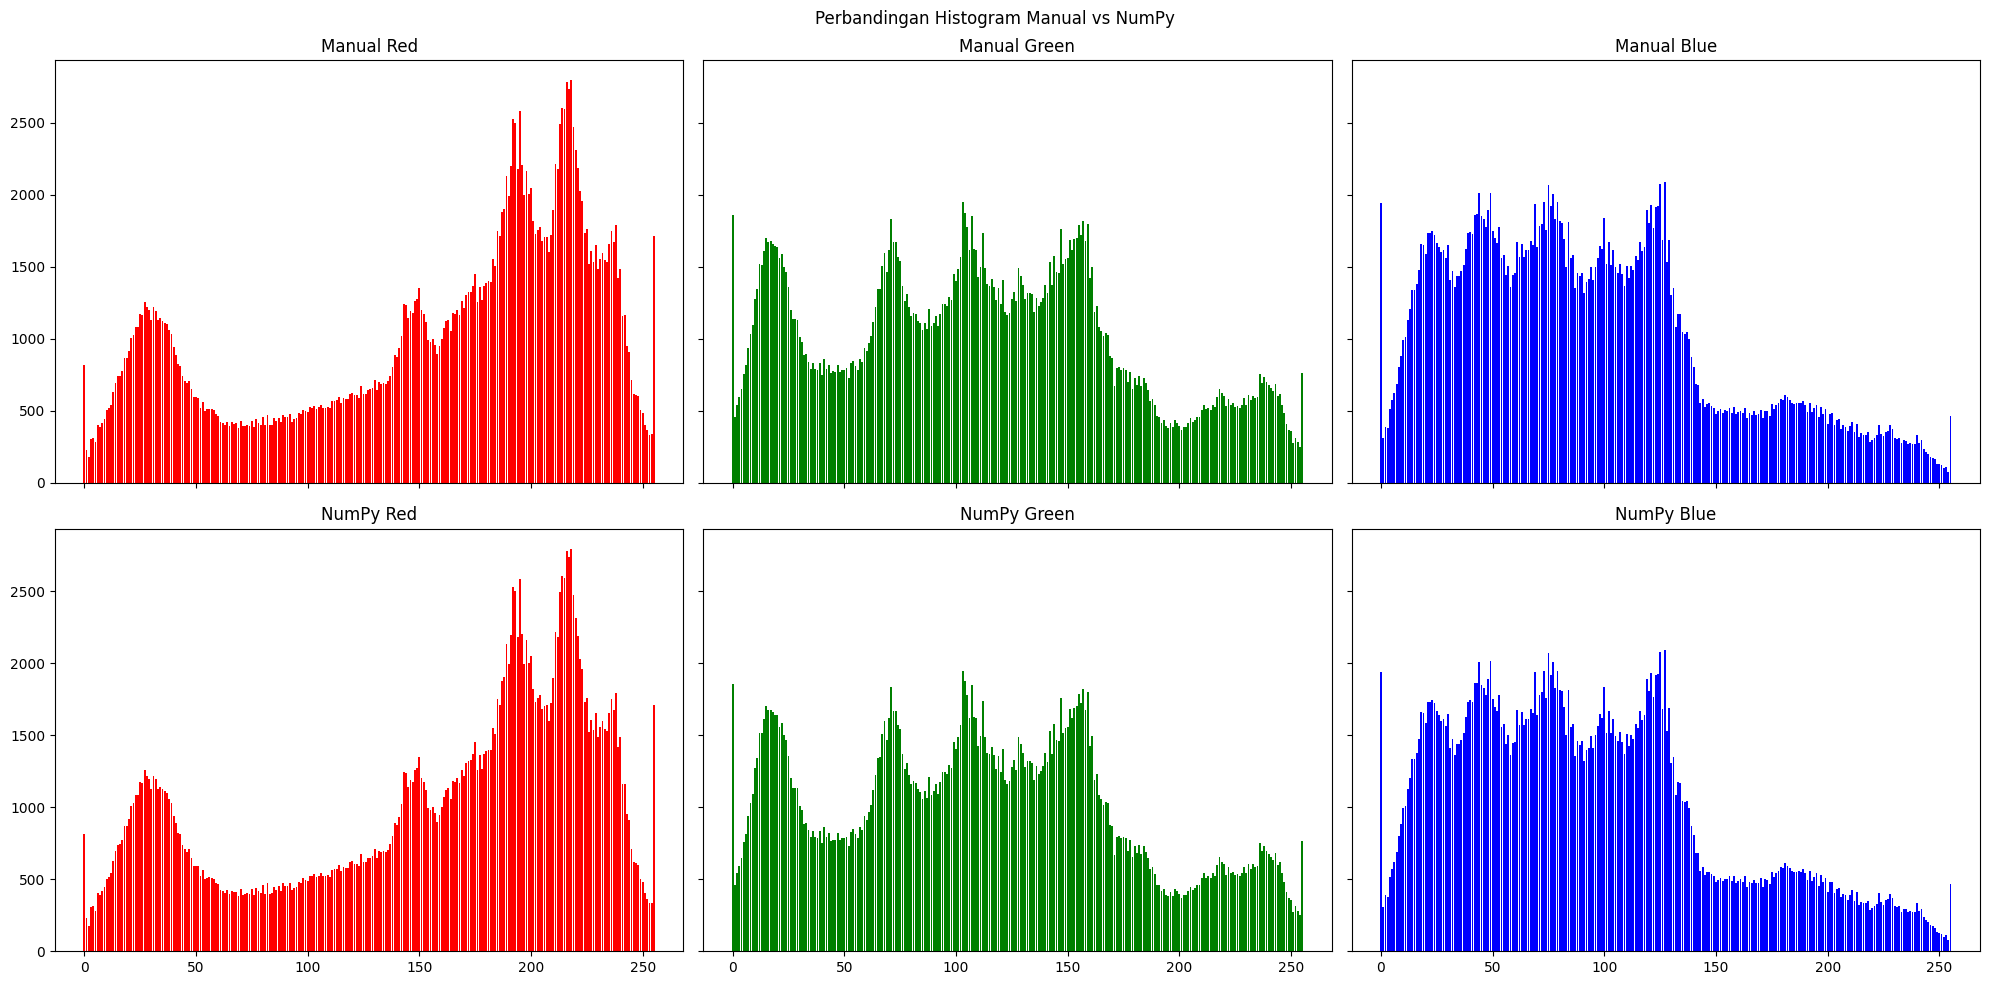

In [12]:
#Cara manual
red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(height):
    for x in range(width):
        red[img[y, x, 0]] += 1
        green[img[y, x, 1]] += 1
        blue[img[y, x, 2]] += 1

#NumPy histogram
hist_r, bins_r = np.histogram(img[:,:,0].ravel(), bins=256, range=(0,256))
hist_g, bins_g = np.histogram(img[:,:,1].ravel(), bins=256, range=(0,256))
hist_b, bins_b = np.histogram(img[:,:,2].ravel(), bins=256, range=(0,256))

#hasil
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=(20,10), sharex=True, sharey=True)
fig.suptitle('Perbandingan Histogram Manual vs NumPy')

#Manual
axs[0,0].bar(names, red, color='red')
axs[0,0].set_title("Manual Red")
axs[0,1].bar(names, green, color='green')
axs[0,1].set_title("Manual Green")
axs[0,2].bar(names, blue, color='blue')
axs[0,2].set_title("Manual Blue")

# NumPy
axs[1,0].bar(names, hist_r, color='red')
axs[1,0].set_title("NumPy Red")
axs[1,1].bar(names, hist_g, color='green')
axs[1,1].set_title("NumPy Green")
axs[1,2].bar(names, hist_b, color='blue')
axs[1,2].set_title("NumPy Blue")

plt.tight_layout()
plt.show()

### Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
### Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
### gelap, terang, atau kontras rendah.

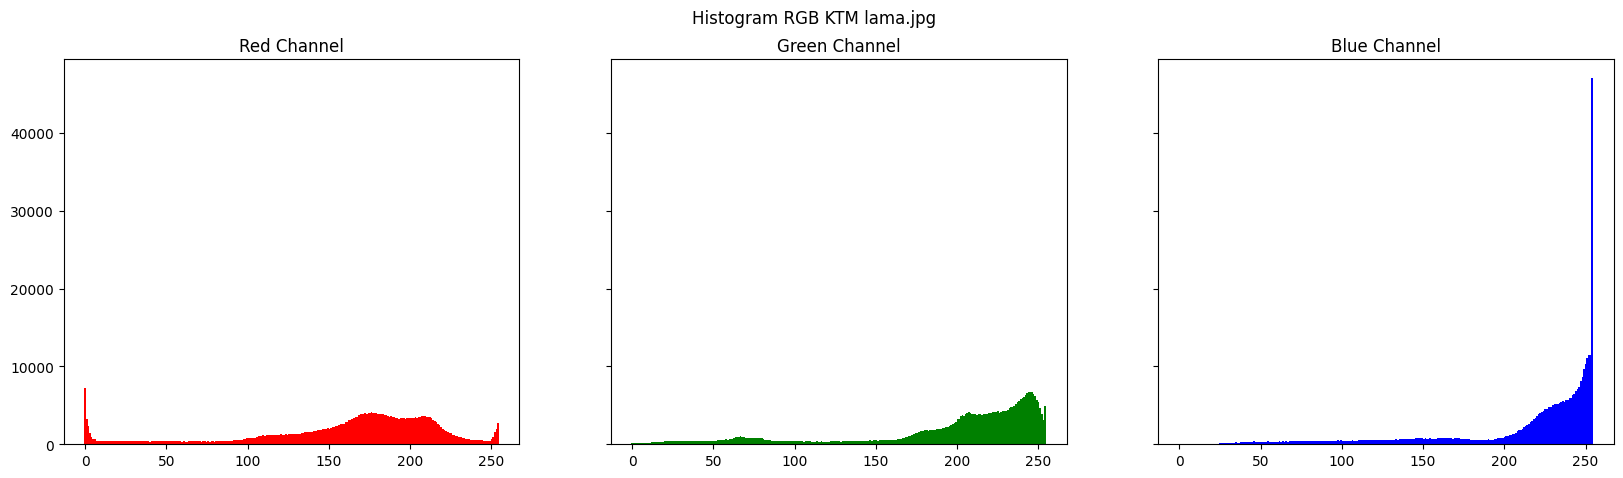

In [13]:
img = cv.imread('/content/drive/MyDrive/pcvk/Gambar Jobsheet 3/KTP7.jpeg')

# Pisahkan channel (ingat OpenCV default BGR)
blue = img[:, :, 0]
green = img[:, :, 1]
red = img[:, :, 2]

# Hitung histogram dengan numpy
hist_b, bins_b = np.histogram(blue, bins=256, range=(0,255))
hist_g, bins_g = np.histogram(green, bins=256, range=(0,255))
hist_r, bins_r = np.histogram(red, bins=256, range=(0,255))

# Plot histogram RGB
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB KTM lama.jpg')

axs[0].bar(bins_r[:-1], hist_r, color='red', width=1)
axs[0].set_title('Red Channel')

axs[1].bar(bins_g[:-1], hist_g, color='green', width=1)
axs[1].set_title('Green Channel')

axs[2].bar(bins_b[:-1], hist_b, color='blue', width=1)
axs[2].set_title('Blue Channel')

plt.show()

Oke, dari histogram RGB yang kamu lampirkan, kita bisa melakukan analisis distribusi intensitas tiap channel:

---

### 1. **Red Channel**

* Intensitas rendah (0–50) ada sedikit pixel → ada area gelap.
* Intensitas menengah (50–150) relatif sedikit.
* Intensitas tinggi (150–255) banyak pixel → citra **dominan terang merah**.
* Ada puncak besar di intensitas tinggi → beberapa area merah cukup kuat.

**Interpretasi:** citra memiliki **komponen merah yang dominan dan terang**, tapi ada sedikit area gelap.

---

### 2. **Green Channel**

* Intensitas rendah (0–100) sangat sedikit → hampir tidak ada area gelap hijau.
* Intensitas menengah (100–200) relatif kecil.
* Intensitas tinggi (200–255) puncak besar → citra **dominan terang hijau**.

**Interpretasi:** channel hijau sebagian besar berada di intensitas tinggi → memberikan kecerahan keseluruhan pada gambar, tapi tidak banyak variasi intensitas menengah.

---

### 3. **Blue Channel**

* Intensitas rendah (0–200) hampir tidak ada → hampir semua pixel biru berada di intensitas tinggi.
* Puncak sangat besar di 250–255 → sebagian besar pixel biru **sangat terang / mendekati putih**.

**Interpretasi:** citra **memiliki banyak highlight atau area terang di channel biru**, bisa muncul efek “pucat” di beberapa bagian gambar.

---

### 🔹 Kesimpulan Umum

* Semua channel cenderung memiliki **intensitas tinggi**, terutama **Blue > Green > Red**.
* Ini menunjukkan citra secara keseluruhan **terang**, tidak gelap, dengan kontras yang **tidak terlalu tinggi**, karena sebagian besar pixel berada di intensitas atas.
* Dominasi intensitas tinggi pada Blue dan Green dapat membuat citra terlihat **“pucat” atau sedikit kebiruan**.
* Ada sedikit variasi intensitas rendah → masih ada area gelap minor.

---

Kalau mau, aku bisa buatkan **visualisasi perbandingan ketiga channel dengan overlay rata-rata** supaya lebih jelas bagian mana terang, gelap, atau kontras rendah.

Apakah mau aku buatkan?


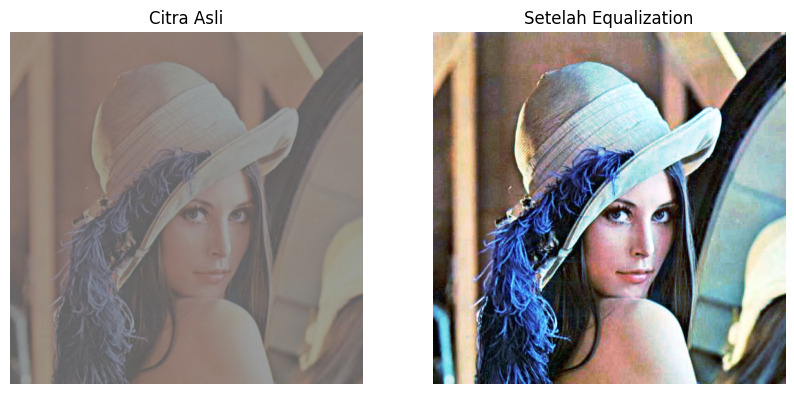

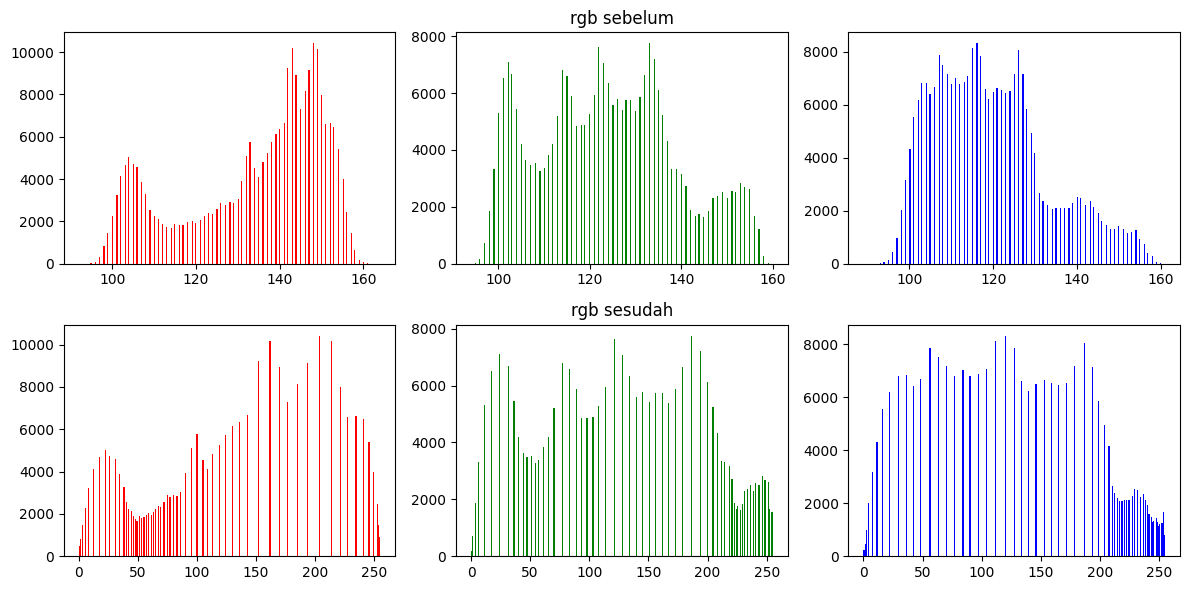

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# baca image
img = cv.imread('/content/drive/MyDrive/pcvk/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ambil dimensi
height, width, depth = img.shape
total_pixels = height * width

# Fungsi manual histogram equalization
def hist_equalization(channel):
    # Hitung histogram
    hist = np.zeros(256, dtype=int)
    for y in range(height):
        for x in range(width):
            hist[channel[y, x]] += 1

    # Hitung CDF(Cumulative Distribution Function)
    cdf = np.cumsum(hist)
    cdf_min = np.min(cdf[np.nonzero(cdf)])
    equalized_map = np.round((cdf - cdf_min) / (total_pixels - cdf_min) * 255).astype('uint8')

    # Mapping pixel lama ke pixel baru
    eq_channel = equalized_map[channel]
    return eq_channel

# Pisahkan channel RGB
r, g, b = cv.split(img)

# Equalization tiap channel
r_eq = hist_equalization(r)
g_eq = hist_equalization(g)
b_eq = hist_equalization(b)

# Gabungkan kembali jadi RGB
img_eq = cv.merge([r_eq, g_eq, b_eq])

# Tampilkan citra asli vs equalization
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title("Setelah Equalization")
plt.axis("off")

plt.show()

# Tampilkan histogram RGB sebelum & sesudah
fig, axs = plt.subplots(2, 3, figsize=(12,6))

# Histogram sebelum
axs[0,0].hist(r.ravel(), bins=256, color='red')
axs[0,1].hist(g.ravel(), bins=256, color='green')
axs[0,1].set_title("rgb sebelum")
axs[0,2].hist(b.ravel(), bins=256, color='blue')
# Histogram sesudah
axs[1,0].hist(r_eq.ravel(), bins=256, color='red')
axs[1,1].set_title("rgb sesudah")
axs[1,1].hist(g_eq.ravel(), bins=256, color='green')
axs[1,2].hist(b_eq.ravel(), bins=256, color='blue')

plt.tight_layout()
plt.show()

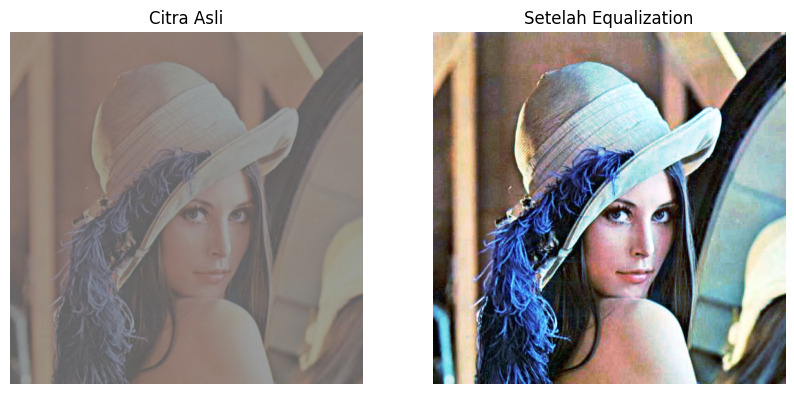

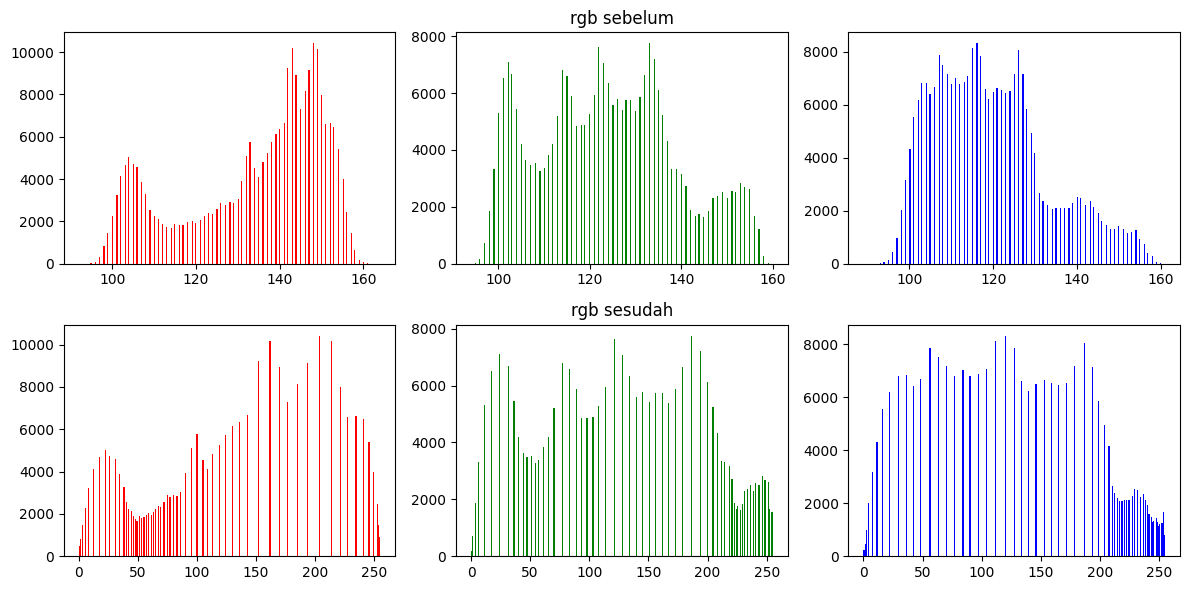

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# baca image
img = cv.imread('/content/drive/MyDrive/pcvk/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Pisahkan channel RGB
r, g, b = cv.split(img)

# Equalization dengan library OpenCV
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali jadi gambar RGB
img_eq = cv.merge([r_eq, g_eq, b_eq])

# Tampilkan citra asli vs equalization
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title(f"Setelah Equalization")
plt.axis("off")

plt.show()

# Tampilkan histogram RGB sebelum & sesudah
fig, axs = plt.subplots(2, 3, figsize=(12,6))

# Histogram sebelum
axs[0,0].hist(r.ravel(), bins=256, color='red')
axs[0,1].hist(g.ravel(), bins=256, color='green')
axs[0,1].set_title("rgb sebelum")

axs[0,2].hist(b.ravel(), bins=256, color='blue')
# Histogram sesudah
axs[1,0].hist(r_eq.ravel(), bins=256, color='red')

axs[1,1].hist(g_eq.ravel(), bins=256, color='green')
axs[1,1].set_title("rgb sesudah")
axs[1,2].hist(b_eq.ravel(), bins=256, color='blue')

plt.tight_layout()
plt.show()

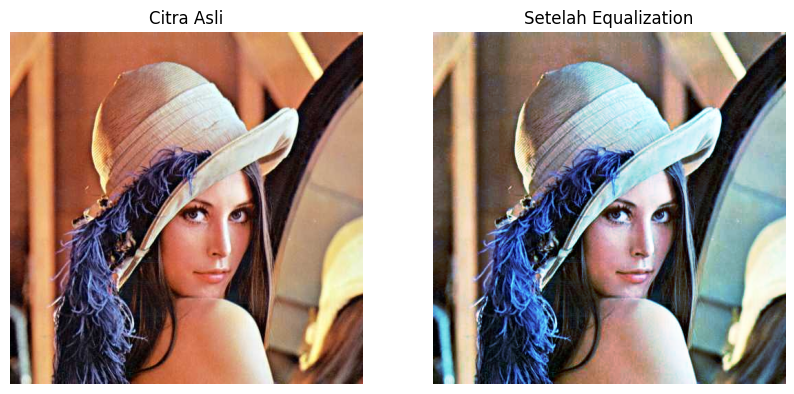

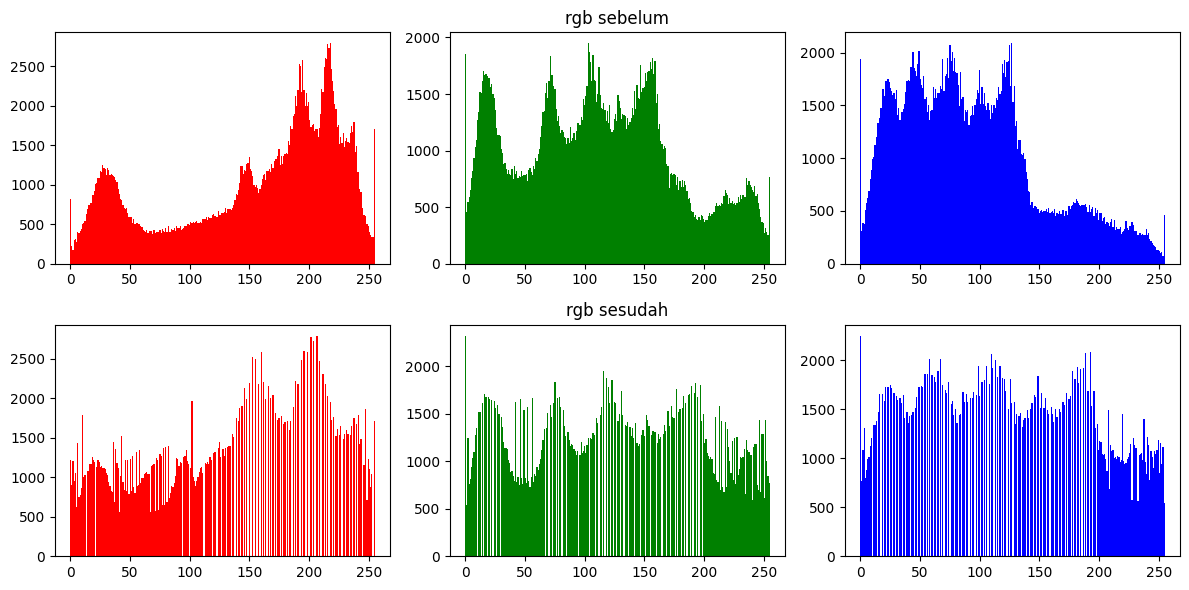

PSNR antara citra asli dan equalization: 17.95 dB


In [43]:
# baca image
img = cv.imread('/content/drive/MyDrive/pcvk/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Pisahkan channel RGB
r, g, b = cv.split(img)

# Equalization dengan library OpenCV
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali jadi gambar RGB
img_eq = cv.merge([r_eq, g_eq, b_eq])

# Tampilkan citra asli vs equalization
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title(f"Setelah Equalization")
plt.axis("off")

plt.show()

# Tampilkan histogram RGB sebelum & sesudah
fig, axs = plt.subplots(2, 3, figsize=(12,6))

# Histogram sebelum
axs[0,0].hist(r.ravel(), bins=256, color='red')
axs[0,1].hist(g.ravel(), bins=256, color='green')
axs[0,1].set_title("rgb sebelum")

axs[0,2].hist(b.ravel(), bins=256, color='blue')
# Histogram sesudah
axs[1,0].hist(r_eq.ravel(), bins=256, color='red')
axs[1,1].hist(g_eq.ravel(), bins=256, color='green')
axs[1,1].set_title("rgb sesudah")
axs[1,2].hist(b_eq.ravel(), bins=256, color='blue')

plt.tight_layout()
plt.show()

# -----------------------------
# Hitung PSNR
# -----------------------------
def psnr(original, processed):
    mse = np.mean((original.astype(np.float64) - processed.astype(np.float64)) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_val = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_val

psnr_value = psnr(img, img_eq)
print(f"PSNR antara citra asli dan equalization: {psnr_value:.2f} dB")


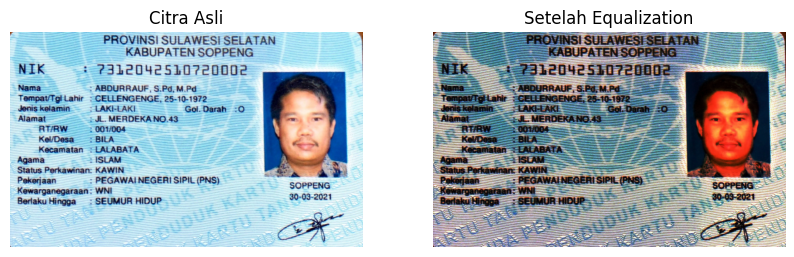

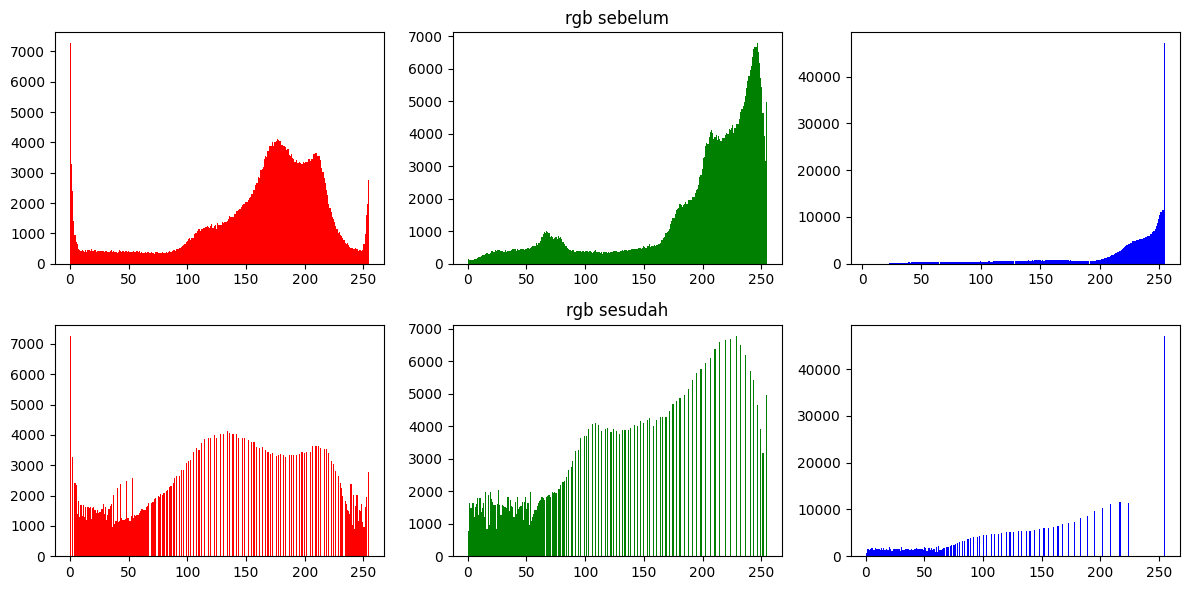

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# baca image
img = cv.imread('/content/drive/MyDrive/pcvk/Gambar Jobsheet 3/KTP7.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Pisahkan channel RGB
r, g, b = cv.split(img)

# Equalization dengan library OpenCV
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali jadi gambar RGB
img_eq = cv.merge([r_eq, g_eq, b_eq])

# Tampilkan citra asli vs equalization
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title(f"Setelah Equalization")
plt.axis("off")

plt.show()

# Tampilkan histogram RGB sebelum & sesudah
fig, axs = plt.subplots(2, 3, figsize=(12,6))

# Histogram sebelum
axs[0,0].hist(r.ravel(), bins=256, color='red')
axs[0,1].hist(g.ravel(), bins=256, color='green')
axs[0,1].set_title("rgb sebelum")

axs[0,2].hist(b.ravel(), bins=256, color='blue')
# Histogram sesudah
axs[1,0].hist(r_eq.ravel(), bins=256, color='red')

axs[1,1].hist(g_eq.ravel(), bins=256, color='green')
axs[1,1].set_title("rgb sesudah")
axs[1,2].hist(b_eq.ravel(), bins=256, color='blue')

plt.tight_layout()
plt.show()

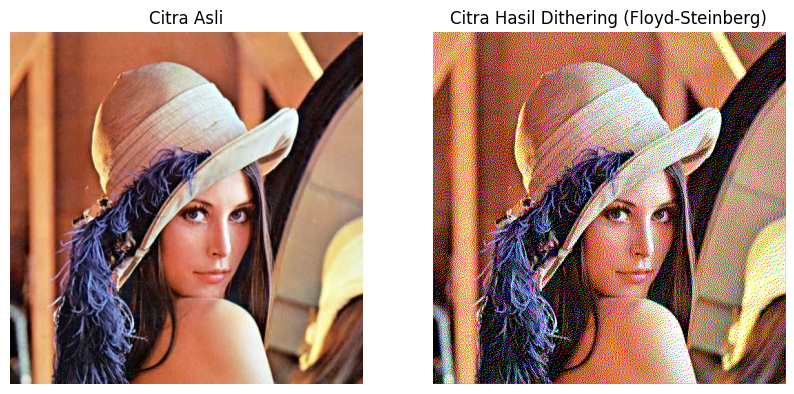

In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca image
img = cv.imread('/content/drive/MyDrive/pcvk/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # ubah ke RGB
height, width, channel = img.shape

# Copy image untuk dithering
img_dither = img.copy().astype(float)

# Loop setiap pixel
for y in range(height - 1):       # sampai height-2 (agar tidak out of bounds)
    for x in range(1, width - 1): # mulai dari 1 sampai width-2

        for c in range(channel):  # R, G, B channel
            old_pixel = img_dither[y, x, c]
            new_pixel = 0 if old_pixel < 128 else 255   # quantisasi biner
            img_dither[y, x, c] = new_pixel

            error = old_pixel - new_pixel

            # Sebarkan error ke tetangga (Floyd-Steinberg)
            img_dither[y, x+1, c]     += error * 7/16
            img_dither[y+1, x-1, c]   += error * 3/16
            img_dither[y+1, x, c]     += error * 5/16
            img_dither[y+1, x+1, c]   += error * 1/16

# Pastikan nilai pixel tetap valid [0, 255]
img_dither = np.clip(img_dither, 0, 255).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_dither)
plt.title("Citra Hasil Dithering (Floyd-Steinberg)")
plt.axis("off")

plt.show()


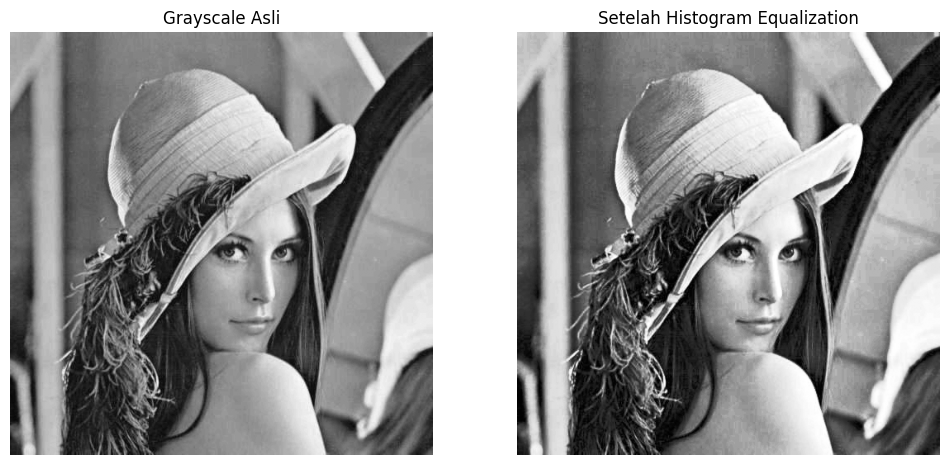

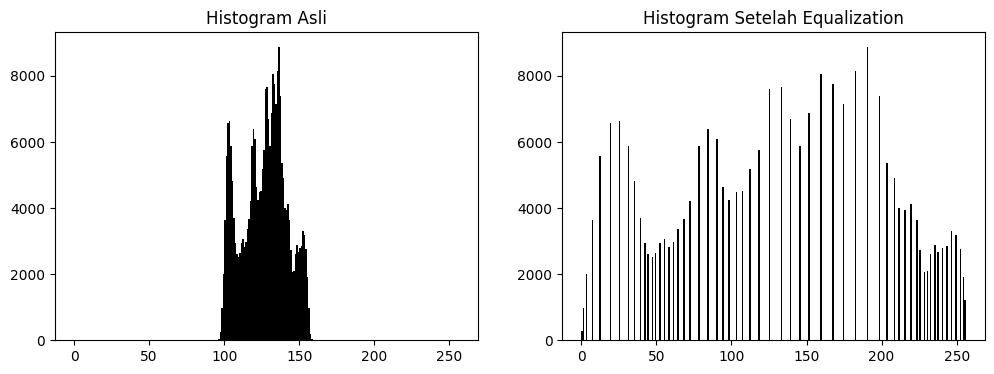

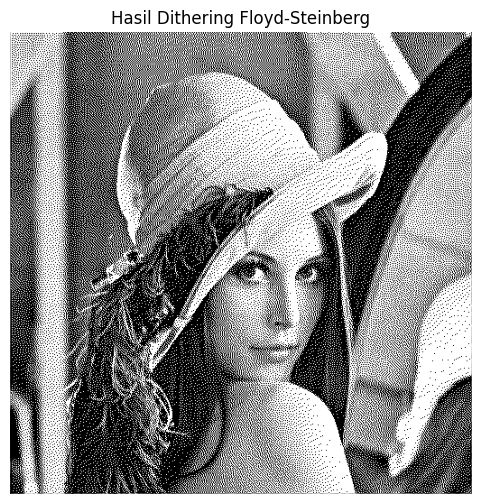

In [51]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca image dan ubah ke grayscale
img = cv.imread('/content/drive/MyDrive/pcvk/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# 2. Histogram Equalization
img_eq = cv.equalizeHist(img)

# 3. Implementasi Floyd-Steinberg Dithering
def floyd_steinberg_dither(image):
    h, w = image.shape
    img_dither = image.astype(float)

    for y in range(h-1):
        for x in range(1, w-1):
            old_pixel = img_dither[y, x]
            new_pixel = 0 if old_pixel < 128 else 255
            img_dither[y, x] = new_pixel
            error = old_pixel - new_pixel

            # Sebar error ke pixel tetangga
            img_dither[y, x+1]     += error * 7/16
            img_dither[y+1, x-1]   += error * 3/16
            img_dither[y+1, x]     += error * 5/16
            img_dither[y+1, x+1]   += error * 1/16

    return np.clip(img_dither, 0, 255).astype(np.uint8)

# Terapkan dithering pada hasil equalization
img_dither = floyd_steinberg_dither(img_eq)

# 4. Plot hasil
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Grayscale Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_eq, cmap='gray')
plt.title("Setelah Histogram Equalization")
plt.axis("off")

plt.show()

# Histogram sebelum dan sesudah equalization
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(img.ravel(), bins=256, range=(0,256), color='black')
plt.title("Histogram Asli")

plt.subplot(1,2,2)
plt.hist(img_eq.ravel(), bins=256, range=(0,256), color='black')
plt.title("Histogram Setelah Equalization")
plt.show()

# Hasil dithering
plt.figure(figsize=(6,6))
plt.imshow(img_dither, cmap='gray')
plt.title("Hasil Dithering Floyd-Steinberg")
plt.axis("off")
plt.show()
